In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from scipy.optimize import curve_fit

In [22]:
# Defining a lattice of randomly displaced points

N = 1000000
R = 10
points = np.random.rand(2,N)*R - R/2

In [23]:
# Defining a function that measures the total wiring length of a particular shape

def get_tot_length(shape, size, squeeze=2):
    
    sel = 0

    if shape=='square':
        # square
        sel = \
            (points[0]<size) * \
            (points[1]<size) * \
            (points[0]>-size) * \
            (points[1]>-size)

    elif shape=='circle':
        #circle
        sel = (points[0]**2 + points[1]**2) < size**2

    else:
        #ellipse, squeeze factor between 0 and 1
        sel = (points[0]**2*squeeze**2 + points[1]**2) < size**2

    sel = sel[None].repeat(2,axis=0)
    selection = points[sel].reshape(2,-1)

    total_length = np.sum(np.sqrt(selection[0]**2 + selection[1]**2))
    area = selection.shape[-1] / N

    return selection, total_length, area

(1009240.6681342096, 0.393018)

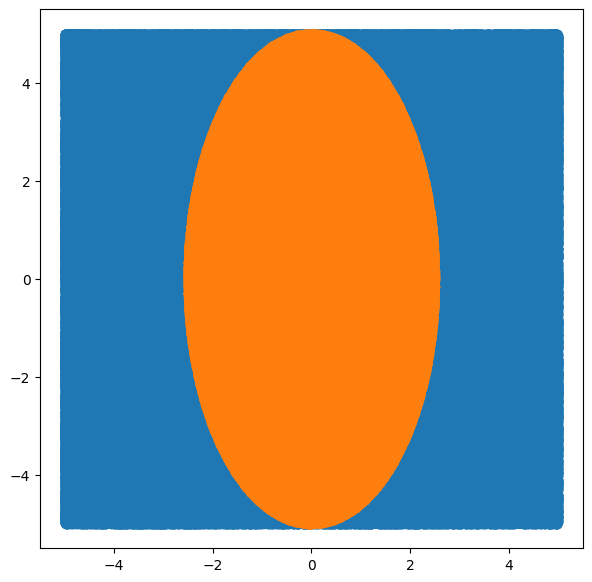

In [24]:
# Testing the function

selection, total_length, area = get_tot_length('ellipse', R/2)

plt.figure(figsize=(7,7))
plt.scatter(points[0], points[1])
plt.scatter(selection[0], selection[1])

total_length, area

In [25]:
T = 10
trials = np.linspace(0.1, R/2.1, T)
total_lengths = np.zeros((3, T))
shapes = ['square', 'circle', 'ellipse']

for i in tqdm(range(T)):
    
    for idx, s in enumerate(shapes):
        
        selection, total_length, area = get_tot_length(s, trials[i])
                
        total_lengths[idx,i] = total_length
    

100%|███████████████████████████████████████████| 10/10 [00:00<00:00, 55.83it/s]


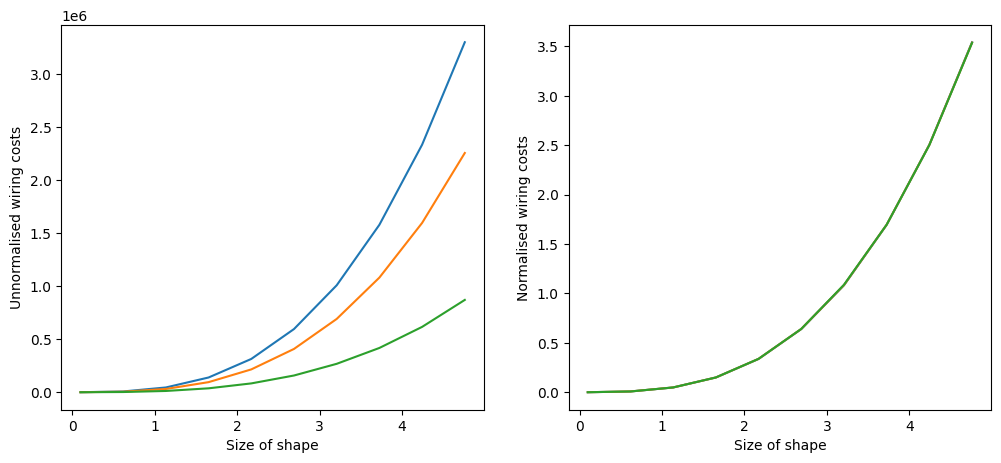

In [26]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.ylabel('Unnormalised wiring costs')
plt.xlabel('Size of shape')
for idx, s in enumerate(shapes):
    plt.plot(trials, total_lengths[idx])
plt.subplot(1,2,2)
plt.ylabel('Normalised wiring costs')
plt.xlabel('Size of shape')
for idx, s in enumerate(shapes):
    plt.plot(trials, total_lengths[idx]/total_lengths[idx].mean())

optimal coefficient for square: 30545.571 optimal power fit: 3.001
optimal coefficient for circle: 21055.695 optimal power fit: 2.996
optimal coefficient for ellipse: 8190.752 optimal power fit: 2.990


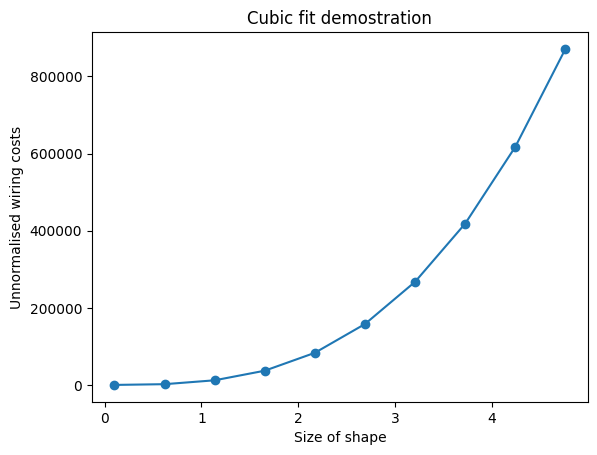

In [27]:
def power_fit(x, c, p):

    return c*x**p

def ellipse_fit(x,a):

    return 1/(a*x**2)

for i,s in enumerate(shapes):

    popt, pcov = curve_fit(power_fit, trials, total_lengths[i])
    
    print('optimal coefficient for '+ s +': '+ format(popt[0], '.3f') + ' optimal power fit: ' + format(popt[1], '.3f'))
  
plt.title('Cubic fit demostration')
plt.ylabel('Unnormalised wiring costs')
plt.xlabel('Size of shape')
plt.scatter(trials, total_lengths[-1])
plt.plot(trials, power_fit(trials, popt[0], popt[1]))  

In [28]:
Te = 20
size = 0.1
pos_squeezes = np.linspace(1, 20, Te//2)
neg_squeezes = 1/np.flip(pos_squeezes)
squeezes = np.concatenate([neg_squeezes, pos_squeezes])
ellipse_costs = np.zeros(Te)

for i,squeeze in tqdm(enumerate(squeezes)):
    
    selection, total_length, area = get_tot_length(s, size, squeeze)
    ellipse_costs[i] = total_length
    
    _, norm, _ = get_tot_length('circle', size)
        
ellipse_costs /= norm

20it [00:00, 284.36it/s]


Optimal coefficient for ellipse squeeze: 1.603


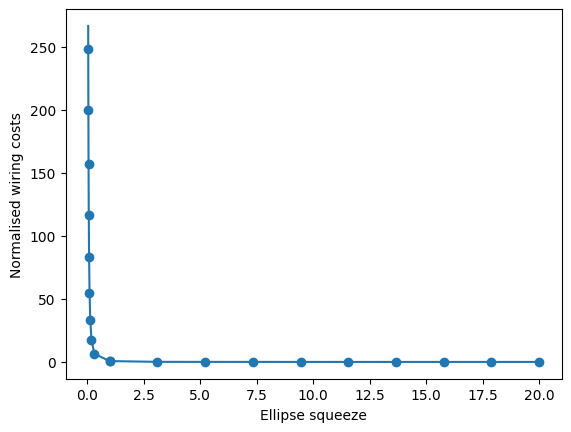

In [30]:
plt.scatter(squeezes, ellipse_costs)
popt, pcov = curve_fit(ellipse_fit, squeezes, ellipse_costs)
print('Optimal coefficient for ellipse squeeze: ' + format(popt[0], '.3f'))
plt.xlabel('Ellipse squeeze')
plt.ylabel('Normalised wiring costs')
plt.plot(squeezes, ellipse_fit(squeezes, 3/2))

In [49]:
N = 100  # Size of the Gaussian
sigma = 30  # Standard deviation

# Create a 1D Gaussian array
x = np.linspace(-N / 2, N / 2, N)
gaussian = (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-x**2 / (2 * sigma**2))

In [50]:
gaussian /= gaussian.max()

In [51]:
a = gaussian

mask = (a + np.random.rand(N)) > 1.25

b = a * mask


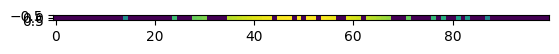

In [52]:
plt.imshow(b[None])

In [53]:
norm = np.emath.logn(b[mask][0], a[mask]).mean()

In [54]:
norm

0.24448734448734452

In [71]:
an = a
an /= an.sum()
bn = (b*mask)**(2)
bn /= bn.sum()
res = (an[mask] / bn[mask])
res.min(), res.max(), res.mean()

(0.41471142553219487, 0.9201656874048187, 0.5061899255513209)